## Evaluation Metrics for Classification Problems


In [25]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Let us consider cancer data set and try to understand the metrics based on the classifier built for cancer prediction.

In [26]:
# importing dataset
df = pd.read_csv('cancer.csv')
df.head()

,Unnamed: 0,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [27]:
# Creating independent and dependent variables
X = df.iloc[:,:-1]
y= df.iloc[:, -1]

In [28]:
# splitting data into train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

In [29]:
# Training a binary classifier using Random Forest Algorithm with default hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=18)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=18)

In [30]:
# # Here X_test, y_test are the test data points
y_pred = clf.predict(X_test)

## Accuracy
#### The accuracy of a classifier is calculated as the ratio of the total number of correctly predicted samples by the total number of samples.

#### Accuracy metric can be used to evaluate the classifier when the data set is a balanced data set. Accuracy metric should not be used when the data set is imbalanced. Let us consider a data set with two target classes containing 100 samples out of which 95 samples belong to class 1 and 5 samples belong to class 2. When we try to build a classifier for the above data set, the classifier will be biased to class 1 and will result is predicting all the samples as class 1 samples. This will result in an accuracy of 95%, which is false. To avoid this mistake accuracy metric should be only used balanced data set.

#### Now let us look into the code to get the accuracy of a classifier:

In [31]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy_Score: {accuracy}')

Accuracy_Score: 0.956140350877193


## Confusion Matrix
#### A confusion matrix is an N dimensional square matrix, where N represents total number of target classes or categories. Confusion matrix can be used to evaluate a classifier whenever the data set is imbalanced.

#### Now let us look into the code to generate and plot the confusion matrix for our cancer classifier.

In [32]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[39  2]
 [ 3 70]]


### There are four important terms in a confusion matrix

#### True Positives (TP): These are the cases where the predicted “Yes” actually belonged to class “Yes”.

#### True Negatives (TN): These are the cases where the predicted “No” actually belonged to class “No”.

#### False Positives (FP): These are the cases where the predicted “Yes” actually belonged to class “No”.

#### False Negatives (FN): These are the cases where the predicted “No” actually belonged to class “Yes”.

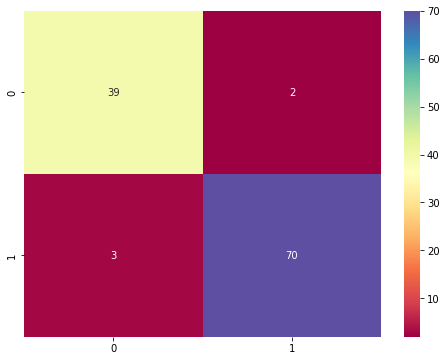

In [33]:
# displaying the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, cmap='Spectral')
plt.show()

#### From the above confusion matrix:

True Positives (TP): 70
False positives (FP): 2
True Negatives (TN): 39
False Negatives (FN): 3

#### The accuracy of the classifier can be calculated from the confusion using the below formula:

Accuracy = (TP + TN) / (TP + FP + TN + FN)

The accuracy of our classifier is: (70+39) / (70+39+2+3) = 0.9561 = 95.61%

## Precision (or Positive Predictive Value)
#### Precision is the ratio of true positives (TP) by the sum of true positives (TP) and false positives (FP).

#### Let us consider a data set with two target classes (say positive and negative) then precision tells us, out of total predicted positive values how many were actually positive. Precision should be used based on the use case. Take an example use case of spam detection. If our model detects a mail as spam which was not actually a spam mail then the user might miss an important mail i.e. here false positives should be reduced. So, in this use case we need to use precision as a metric to measure the quality of our classifier.

#### Now let us look into the code to calculate the precision score for our cancer classifier:

In [34]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred)
print(f'Precision_Score: {precision}')

Precision_Score: 0.9722222222222222


## Recall (or Sensitivity or True Positive Rate)
#### Recall is the ratio of true positives (TP) by the sum of true positives (TP) and false negatives (FN).

#### Let us consider a data set with two target classes (say positive and negative) then recall tells us, out of total actual negative values how many did our classifier predict negatively. Similar to precision, recall should also be used based on the use case. Take an example use case of cancer prediction. Consider a person who is actually having cancer but was predicted as a non-cancer patient by our classifier which can lead to mistreatment of the person i.e. here false negatives should be reduced. So, in this case, we need to use recall as a metric to measure the quality of our classifier.

#### Now let us look into the code to calculate the recall score for our cancer classifier:

In [35]:
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred)
print(f'Recall_Score: {recall}')

Recall_Score: 0.958904109589041


## F1 Score
#### F1 score should be used when both precision and recall are important for the use case. F1 score is the harmonic mean of precision and recall. It lies between [0,1].

F1 score is derived from F Beta Score. F Beta score is the weighted harmonic mean of precision and recall.

If both False Positives (FP) and False Negatives (FN) are important then β = 1.
If False Positive (FP) is important then β lies between o and 1.
If False Negative (FN) is important then β > 1.
Now let us look into the code to calculate the f1 score for our cancer classifier:

In [36]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)
print(f'f1_Score: {f1}')

f1_Score: 0.9655172413793104
